In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Crime1 = pd.read_csv("crime_data.csv")

In [3]:
Crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ KB


In [4]:
# normalization

def norm(i):
    x = (i-i.min())/(i.max() - i.min())
    return x

In [9]:
Crime_norm = norm(Crime1.iloc[:,1:])
Crime_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [11]:
# find the Z value

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [15]:
z = linkage(Crime_norm, method="complete", metric = 'euclidean')
z

array([[1.40000000e+01, 2.80000000e+01, 4.99862313e-02, 2.00000000e+00],
       [1.20000000e+01, 3.10000000e+01, 8.71860232e-02, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 1.07560045e-01, 2.00000000e+00],
       [2.20000000e+01, 4.80000000e+01, 1.24475500e-01, 2.00000000e+00],
       [1.90000000e+01, 3.00000000e+01, 1.32688717e-01, 2.00000000e+00],
       [3.50000000e+01, 4.50000000e+01, 1.44578065e-01, 2.00000000e+00],
       [3.60000000e+01, 4.60000000e+01, 1.48312560e-01, 2.00000000e+00],
       [1.80000000e+01, 5.00000000e+01, 1.64643019e-01, 3.00000000e+00],
       [4.00000000e+01, 4.70000000e+01, 1.78647476e-01, 2.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 1.80637986e-01, 3.00000000e+00],
       [2.50000000e+01, 2.60000000e+01, 1.85305888e-01, 2.00000000e+00],
       [3.40000000e+01, 3.70000000e+01, 1.91633219e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.96467627e-01, 2.00000000e+00],
       [2.30000000e+01, 3.90000000e+01, 1.98104543e

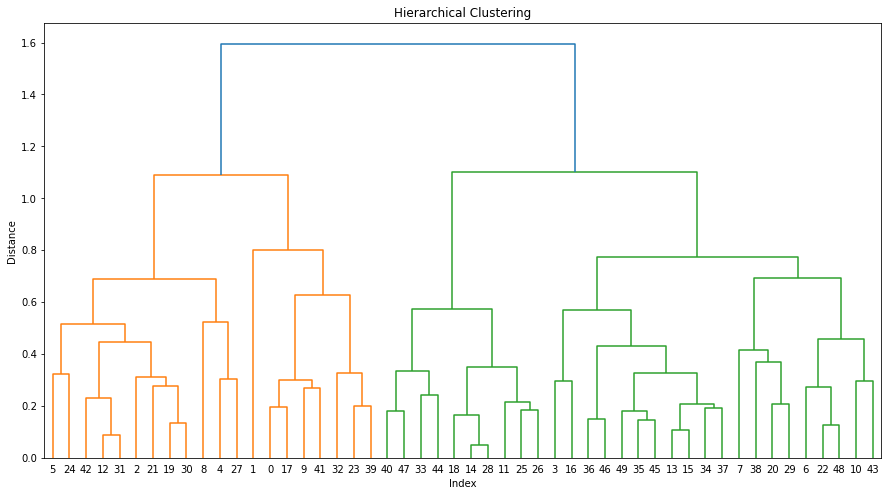

In [20]:
plt.figure(figsize = (15,8)); plt.title("Hierarchical Clustering"); plt.xlabel("Index"); plt.ylabel("Distance")

sch.dendrogram(z, leaf_rotation = 0, leaf_font_size=10)
plt.show()

# so we can do two clusters

In [22]:
# do agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

In [26]:
h_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity = 'euclidean').fit(Crime_norm)

In [28]:
cluster_labels = pd.Series(h_complete.labels_)

In [29]:
cluster_labels

0     1
1     1
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     1
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    0
19    1
20    0
21    1
22    0
23    1
24    1
25    0
26    0
27    1
28    0
29    0
30    1
31    1
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    1
40    0
41    1
42    1
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int32

In [ ]:
Crime1['clust'] = cluster_labels

In [ ]:
Crime1 = Crime1.iloc[:,[5,1,2,3,4,]]

In [39]:
Crime1

,clust,Murder,Assault,UrbanPop,Rape
0,1,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,1,8.1,294,80,31.0
3,0,8.8,190,50,19.5
4,1,9.0,276,91,40.6
5,1,7.9,204,78,38.7
6,0,3.3,110,77,11.1
7,0,5.9,238,72,15.8
8,1,15.4,335,80,31.9
9,1,17.4,211,60,25.8


In [41]:
Crime1.to_csv("Crime_ans.csv")